In [2]:
import pandas as pd
import itertools
import re

import data_cleaning as data_cleaning


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
chords_df = pd.read_pickle('/home/student/Desktop/Project/Data/chords_split_lang.pkl')
chords_df

,artist_name,song_name,chords&lyrics,chords,lyrics,tabs,lang
0,Justin Bieber,"10,000 Hours",\nCapo on 3rd fret\n\t \t\t \r\n\r\nVerse 1:\...,{3: 'G G/B ...,"{0: ' Capo on 3rd fret ', 1: '', 2: 'Ver...",{},en
1,Justin Bieber,2 Much,\n\t \t\t\r\nIntro: F#m7 D2 \r\n\r\nVerse 1:...,"{1: 'Intro: F#m7 D2 ', 4: 'F#m7 ', 6: ' ', 1...","{0: ' ', 2: '', 3: 'Verse 1:', 5: ' Ma...","{8: 'D2 ', 61: 'D2 '}",en
2,Justin Bieber,2u (feat. David Guetta),\n\t \t\t\r\nEm D C ...,{1: 'Em D C C...,"{0: ' ', 2: 'No limit in the sky that I w...",{},en
3,Justin Bieber,All Around The World,\nCapo on 4th fret\n\t \t\t\r\n\r\n \r\n\r\n ...,"{2: ' ', 4: ' Intro: Em Bm Am C (2x) ', 6...","{0: ' Capo on 4th fret ', 1: '', 3: '', 5...",{},en
4,Justin Bieber,All Around The World (acoustic),\n\t \t\t\r\n\r\nIntro: Gm - Dm - C - C x2 ...,"{5: ' Gm Dm ', 7: ' C ...","{0: ' ', 1: '', 2: 'Intro: Gm - Dm - C - ...",{29: 'B|-----------11----11--------------6---6...,en
...,...,...,...,...,...,...,...
135778,Simon & Garfunkel,The Only Living Boy In New York,\n\t \t\tB E \r\nT...,"{2: 'B E ', 6: ' ...","{0: ' B E ', 1...",{},en
135779,Simon & Garfunkel,The sound of silence,\nCapo on 6th fret\n\t \t\t \r\n\r\nIntro: A5...,"{2: 'Intro: A5(9) ', 5: 'A5(9) ...","{0: ' Capo on 6th fret ', 1: '', 3: '', ...",{},en
135780,Simon & Garfunkel,The sounds of silence,\nCapo on 5th fret\n\t \t\t\r\n \r\nDm ...,"{1: ' ', 2: 'Dm C ', 4...","{0: ' Capo on 5th fret ', 3: 'Hello darkn...",{},en
135781,Simon & Garfunkel,The Times They Are A - Changin,\n\t \t\tWritten by Bob Dylan. This is Simon ...,"{3: 'G Em ', 5: ' C G ',...",{0: ' Written by Bob Dylan. This is Simon...,{},en


In [7]:
chords_df.groupby('lang').count().sort_values('song_name')

,artist_name,song_name,chords&lyrics,chords,lyrics,tabs
lang,,,,,,
lt,1,1,1,1,1,1
ko,3,3,3,3,3,3
sl,4,4,4,4,4,4
cs,4,4,4,4,4,4
vi,7,7,7,7,7,7
sk,8,8,8,8,8,8
sq,10,10,10,10,10,10
pl,10,10,10,10,10,10
ro,15,15,15,15,15,15


In [24]:
chords_df[chords_df['lang'] == 'de']['lyrics'].iloc[0]

{0: '\n\t  \t\tIntro:   F     F#     G     F     F#     G     F     F#     G      G7 ',
 1: '',
 3: 'Oh komm doch, komm zu mir',
 5: 'Du nimmst mir den Verstand',
 7: 'Oh komm doch, komm zu mir',
 9: 'Komm, gib mir deine Hand!',
 11: 'Komm, gib mir deine Hand,',
 13: 'Komm, gib mir deine Hand.',
 14: '',
 16: 'Oh du bist so schön',
 18: 'Schön wie ein Diamant',
 20: 'Ich will mit dir gehen',
 22: 'Komm, gib mir deine Hand!',
 24: 'Komm, gib mir deine Hand,',
 26: 'Komm, gib mir deine Hand.',
 27: '',
 28: 'Chorus:',
 30: 'In deinen Armen bin ich glücklich und froh',
 32: "Das war noch nie bei einen Ander'n ",
 34: 'Einmal so, einmal so, einmal so!',
 35: '',
 37: 'Oh komm doch, komm zu mir',
 39: 'Du nimmst mir den Verstand',
 41: 'Oh komm doch, komm zu mir',
 43: 'Komm, gib mir deine Hand!',
 45: 'Komm, gib mir deine Hand,',
 47: 'Komm, gib mir deine Hand.',
 48: '',
 49: 'Chorus:',
 51: 'In deinen Armen bin ich glücklich und froh',
 53: "Das war noch nie bei einen Ander'n ",
 55: 'Ei

In [3]:
artists_df =pd.read_pickle('/home/student/Desktop/Project/Data/artists.pkl')
artists_df

,id,followers,genres,name,popularity,name_e_chords
0,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100,justin-bieber
1,4q3ewBCX7sLwd24euuV69X,32244734.0,"['latin', 'reggaeton', 'trap latino']",Bad Bunny,98,bad-bunny
2,06HL4z0CvFAxyc27GXpf02,38869193.0,"['pop', 'post-teen pop']",Taylor Swift,98,taylor-swift
3,3TVXtAsR1Inumwj472S9r4,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake,98,drake
4,3Nrfpe0tUJi4K4DXYWgMUX,31623813.0,"['k-pop', 'k-pop boy group']",BTS,96,bts
...,...,...,...,...,...,...
7307,2Qj1jkMGSEBkV79XahHh06,0.0,[],Husky,0,husky
7308,2ilVLPwETz7yH2BrWNyvdA,7.0,[],Amir,0,amir
7309,36fSPPJniEZZE8LsDjMHwJ,0.0,[],Jackie Wilson,0,jackie-wilson
7310,3kuryc9YsBG3ckDA5H0uhA,5.0,[],Alberto,0,alberto


In [130]:
chords_df.merge(artists_df, left_on='artist_name', right_on='name', how='left')

,artist_name,song_name,chords&lyrics,id,followers,genres,name,popularity,name_e_chords
0,Justin Bieber,"10,000 Hours",\nCapo on 3rd fret\n\t \t\t \r\n\r\nVerse 1:\...,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100,justin-bieber
1,Justin Bieber,2 Much,\n\t \t\t\r\nIntro: F#m7 D2 \r\n\r\nVerse 1:...,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100,justin-bieber
2,Justin Bieber,2u (feat. David Guetta),\n\t \t\t\r\nEm D C ...,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100,justin-bieber
3,Justin Bieber,All Around The World,\nCapo on 4th fret\n\t \t\t\r\n\r\n \r\n\r\n ...,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100,justin-bieber
4,Justin Bieber,All Around The World (acoustic),\n\t \t\t\r\n\r\nIntro: Gm - Dm - C - C x2 ...,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100,justin-bieber
...,...,...,...,...,...,...,...,...,...
150972,Simon & Garfunkel,The Only Living Boy In New York,\n\t \t\tB E \r\nT...,70cRZdQywnSFp9pnc2WTCE,3354252.0,"['classic rock', 'folk', 'folk rock', 'melanch...",Simon & Garfunkel,76,simon-&-garfunkel
150973,Simon & Garfunkel,The sound of silence,\nCapo on 6th fret\n\t \t\t \r\n\r\nIntro: A5...,70cRZdQywnSFp9pnc2WTCE,3354252.0,"['classic rock', 'folk', 'folk rock', 'melanch...",Simon & Garfunkel,76,simon-&-garfunkel
150974,Simon & Garfunkel,The sounds of silence,\nCapo on 5th fret\n\t \t\t\r\n \r\nDm ...,70cRZdQywnSFp9pnc2WTCE,3354252.0,"['classic rock', 'folk', 'folk rock', 'melanch...",Simon & Garfunkel,76,simon-&-garfunkel
150975,Simon & Garfunkel,The Times They Are A - Changin,\n\t \t\tWritten by Bob Dylan. This is Simon ...,70cRZdQywnSFp9pnc2WTCE,3354252.0,"['classic rock', 'folk', 'folk rock', 'melanch...",Simon & Garfunkel,76,simon-&-garfunkel


### using sample

In [81]:
chords_df = chords_df.sample(100)

In [82]:
chords_df[['chords', 'lyrics', 'tabs']] = chords_df[['chords&lyrics']].apply(
    lambda x: data_cleaning.split_chords_lyrics_and_tabs(x[0]), axis=1, result_type ='expand')

In [93]:
chords_df['lang'] = chords_df['lyrics'].apply(lambda x: '\n'.join(x.values()))\
                                            .apply(lambda x: data_cleaning.predict_lang(x))

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

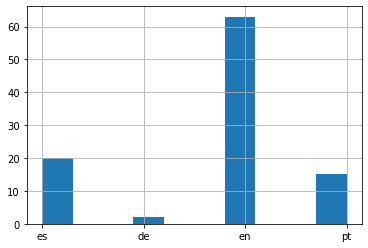

In [95]:
chords_df.lang.hist()

In [78]:
from pprint import pprint
for i, row in chords_df.reset_index(drop=True).iterrows():
    print(row['song_name'], '-' ,row['artist_name'])
    print('------------------tabs-------------------:')
    pprint(row['tabs'])
    print('------------------chords-------------------:')
    pprint(row['chords'])
    print('------------------lyrics-------------------:')
    pprint(row['lyrics'])
    if i>10:
        break

The Young Crazed Peeling - The Distillers
------------------tabs-------------------:
{}
------------------chords-------------------:
{1: '        G        F      C ',
 3: '        G        F     C ',
 5: '         G               F                C ',
 7: '      G       F      C ',
 9: ' ',
 10: ' ',
 11: 'G                F      ',
 13: 'C ',
 15: '  G                   F ',
 17: '   C ',
 19: 'G               F ',
 21: 'C ',
 23: 'G                           F ',
 25: 'C ',
 27: ' ',
 28: 'F  C  G        F#  F   C      G      G  F# F  ',
 30: 'F  C  G        F#  F   C      G ',
 32: ' ',
 42: ' ',
 44: ' ',
 52: ' ',
 54: ' ',
 59: ' ',
 61: ' ',
 62: ' '}
------------------lyrics-------------------:
{0: '\n\t  \t\t ',
 2: 'Are you ready to be liberated ',
 4: 'On this sad side city street ',
 6: 'Well the birds have been freed from their cages ',
 8: 'I got freedom and my youth ',
 12: "My name is Brody I'm from Melbourne ",
 14: 'Fitzroy Melbourne Fitzroy Melbourne ',
 16: 'I grew 

 79: 'Tengo curiosidades ',
 80: 'De besar tu piel ',
 81: 'Y cada una de tus extremidades ',
 82: 'Sabes mami ',
 83: 'Tengo lo que tu buscas aquí ',
 84: 'Todo pa ti ',
 85: 'Arcángel pa tu sabes mi nombre ',
 86: 'Si tu estas conmigo ',
 87: 'Pronto vas a soltarte ',
 88: 'Acicalarte te amo pa pisarte ',
 89: 'Atrévete conmigo ',
 90: 'Podrás escaparte ',
 91: 'Tranquila que nada va a pasarte prra ',
 92: '',
 93: 'Arcangel y Mackie ',
 94: 'Yo te cuidare.. ',
 95: 'No permitiré que nada te pase ',
 96: 'Te protegeré ',
 97: 'No piedad pa aquel que se propase ',
 98: '',
 99: 'Nada va a pasar ',
 100: 'Tu tranquila nadie va a tocarte ',
 101: 'Nada va a pasar ',
 102: 'Estoy aquí pa ti para cuidarte ',
 103: 'Nada va a pasar ',
 104: 'Nada va a pasar ',
 105: 'Nada va a pasar ',
 106: 'Nada va a pasar ',
 107: '\t\t  \n'}
Palavra Mágica - Chico César
------------------tabs-------------------:
{}
------------------chords-------------------:
{2: 'A ',
 4: '                   E ',
 6: 